# Thinkful Prep Course Capstone 

__Introduction__<BR>
    
This prep course has opened my eyes to a variety of new applications. Its also taught me, during late night study sessions and hangry attacks, the blessing that is a bowl of crispy cereal and cold milk. Therefore, it only seems appropriate to combine my two new hobbies, here, in my capstone.
___

## Section One: Describe the data

My cereal dataset was posted as a [CSV file on Kaggle](https://www.kaggle.com/crawford/80-cereals) by user Chris Crawford. The original data points were collected and cleaned by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. These datasets are a tidy collection of mainly nutritional and physical characteristics in addition to a few other explanatory and response variables. 

Below is the entire list of variables: <BR>
• Name of cereal <BR>
• Grams of complex carbohydrates <BR>
• Manufacturer of cereal <BR>
• Grams of sugars <BR>
• Cereal type (hot or cold) <BR>
• Milligrams of potassium <BR>
• Calories per serving <BR>
• Percentage of FDA recommended vitamins and minerals <BR>
• Grams of protein <BR>
• Shelf display <BR>
• Grams of fat <BR>
• Weight in ounces of one serving <BR>
• Milligrams of sodium <BR>
• Number of cups in one serving <BR>
• Grams of dietary fiber <BR>
• Rating of the cereals <BR>

Let's get into the visual and statistical summaries for the variables used in this analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

In [2]:
cereal = pd.read_csv('cereal.csv')

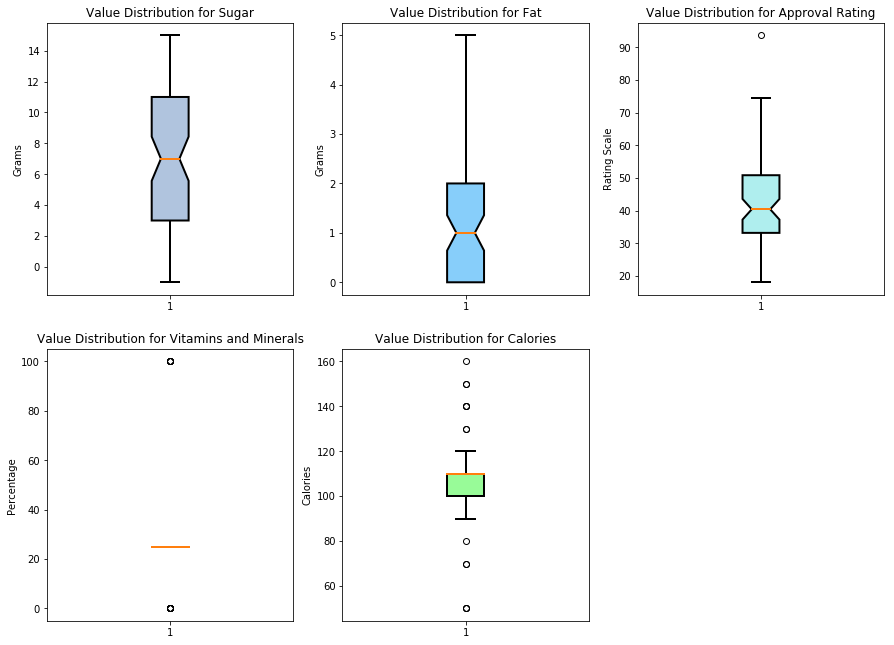

In [3]:
plt.figure(figsize=(15, 11))

plt.subplot(2, 3, 1)
bp = plt.boxplot(cereal['sugars'], 1, patch_artist=True)

for box in bp['boxes']:
    box.set(linewidth=2)
    box.set(facecolor='lightsteelblue')
    
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)
    
for cap in bp['caps']:
    cap.set(linewidth=2)
    
for median in bp['medians']:
     median.set(linewidth=2)
    
plt.ylabel('Grams')
plt.title('Value Distribution for Sugar')


plt.subplot(2, 3, 2)
bp = plt.boxplot(cereal['fat'], 1, patch_artist=True)

for box in bp['boxes']:
    box.set(linewidth=2)
    box.set( facecolor='lightskyblue')
    
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)
    
for cap in bp['caps']:
    cap.set(linewidth=2)
    
for median in bp['medians']:
     median.set(linewidth=2)

plt.ylabel('Grams')
plt.title('Value Distribution for Fat')


plt.subplot(2, 3, 3)
bp = plt.boxplot(cereal['rating'], 1, patch_artist=True)

for box in bp['boxes']:
    box.set(linewidth=2)
    box.set(facecolor='paleturquoise')
    
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)
    
for cap in bp['caps']:
    cap.set(linewidth=2)
    
for median in bp['medians']:
     median.set(linewidth=2)
    
plt.ylabel('Rating Scale')
plt.title('Value Distribution for Approval Rating')


plt.subplot(2, 3, 4)
bp = plt.boxplot(cereal['vitamins'], patch_artist=True)
    
for median in bp['medians']:
     median.set(linewidth=2)

plt.ylabel('Percentage')
plt.title('Value Distribution for Vitamins and Minerals')


plt.subplot(2, 3, 5)
bp = plt.boxplot(cereal['calories'], patch_artist=True)

for box in bp['boxes']:
    box.set(linewidth=2)
    box.set(facecolor='palegreen')
    
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)
    
for cap in bp['caps']:
    cap.set(linewidth=2)
    
for median in bp['medians']:
     median.set(linewidth=2)

plt.ylabel('Calories')
plt.title('Value Distribution for Calories')

plt.show()

I decided to use the boxplot to explore my data. It's an excellent five number summary with an emphasis on extreme values. Also, I’m serious about my cereal game and boxplots `mean` business. 

From these visuals, I can make a couple of vague statements. It seems these cereals, generally, are low-fat with an average of 7 grams of sugar per serving. Also notable, all of the cereals in this sample have either 0, 25, or 100 percent of the FDA recommended vitamins and minerals providing us with an abrupt, possibly skewed distribution. Finally, I found the approval rating for these cereals unexpected, with 75% of the cereals scoring a 50 out of 100 or below. 

___


## Section Two: Analytic Questions

Sugar and fat are often used to enhance the flavor of a recipe. I know a lot of these cereals are low in fat, but I wonder if cereals with higher sugar or higher fat are more liked. 

__*1.) Which of the following two groups of cereals on average are more liked: high fat or high sugar?*__


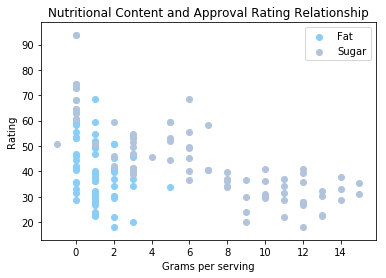

In [10]:
plt.scatter(
    x=cereal['fat'],
    y=cereal['rating'],
    color='lightskyblue',
    label='Fat')

plt.scatter(
    x=cereal['sugars'],
    y=cereal['rating'],
    color='lightsteelblue',
    label='Sugar')

plt.ylabel('Rating')
plt.xlabel('Grams per serving')
plt.title('Nutritional Content and Approval Rating Relationship')

plt.legend(loc='upper right')

plt.show()

Interesting result. As previously mentioned, there aren’t many high-fat cereals relative to sugar. That’s likely a result of the early 90’s low-fat diet trend. Dietary recommendations came out to reduce intake of fatty foods. As a result, manufacturers increased sugar in products to make up for lack of taste. 

But surprisingly, high-sugar cereals, according to this chart, did not receive a high rating. Actually, it appears sugar and fat have a weak negative correlation with approval ratings.

So which cereals did earn a high rating?

In [18]:
top_cereals = cereal.loc[lambda df: cereal['rating']>=60.0, :]
top_cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787


It appears that all the cereals with a high rating are low in calories, fat, sodium and sugar. 

On the original Kaggle posting, the ‘rating’ column was unconfidently labeled with the description, “Possibly from Consumer Reports?”. Now after looking at this further, these surveys were either filled out by Tour de France athletes or it’s actually a nutritional rating. 

Regardless of the interpretation, according to these data, the lower the sugar, the better the rating.  

*2.) I don’t always have time to make a fancy quinoa fruit bowl in the morning, so it would be nice to find a cereal that isn’t devoid of all nutrients. This raises the question: __What’s the percentage of cereals that have 100% of the FDA recommended vitamins & minerals?__*

Text(0.5,1,'Vitamins and Minerals Distribution')

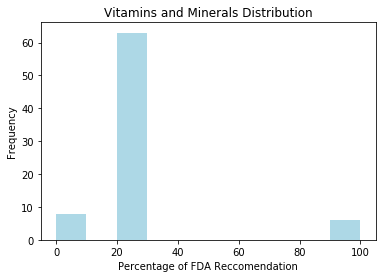

In [56]:
plt.hist(cereal['vitamins'], color='lightblue', bins=10)
plt.ylabel('Frequency')
plt.xlabel('Percentage of FDA Reccomendation')
plt.title('Vitamins and Minerals Distribution')

In [22]:
cereal.vitamins.value_counts()

25     63
0       8
100     6
Name: vitamins, dtype: int64

Not many. In fact, the answer is six or 7.8%. Additionally, none of these six show up in my healthiest cereals --even when I drop the acceptance rating to 50.0. I guess I should just take a multivitamin and settle for a cereal with 25%, which in this case, is the next closest percent.


In [23]:
top_cereals = cereal.loc[lambda df: cereal['rating']>=50.0, :]
top_cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.00,1.25,50.764999
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80,58.345141
32,Grape Nuts Flakes,P,C,100,3,1,140,3.0,15.0,5,85,25,3,1.00,0.88,52.076897
33,Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3,90,25,3,1.00,0.25,53.371007
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917


Ok. I’ve come away with a few findings. But I need to know the probability of grabbing a box with these characteristics at random (since in the future I will obviously be too busy with my cool data job to look before checking out). Also, for a challenge, let’s say I grabbed this cereal from a low-calorie section. 

To recap, the question looks like this:

__*3.) What's the probability that I grabbed a sugarless cereal with 25% of the recommended vitamins and minerals, given that it came from the low-calorie section?*__ 

First, I will have to define low-calorie cereals. I was able to find an article about low-calorie cereals recommending 110 calories or less per serving. Let's pretend that's the cut-off point of this imaginary grocery store as well. Next, I will need to find the amount of sugarless low-calorie cereals that contain exactly 25% of our recommended vitamins and minerals. Finally, I will need to multiply Event A (the probability of grabbing a low calorie cereal) by Event B (the probability of grabbing a sugarless cereal with 25% of recommended vitamins and minerals given that it's low-calorie).

In [32]:
low_cal = cereal.loc[lambda df: cereal['calories']<=110, :]

In [34]:
low_cal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,99.830508,2.491525,0.711864,155.932203,1.986441,14.635593,5.915254,83.610169,27.118644,2.050847,0.980169,0.841017,45.456501
std,15.142032,1.150306,0.743961,90.227082,2.519678,4.578652,4.422857,67.149862,21.419524,0.859505,0.093375,0.243039,14.390800
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,22.396513
25%,100.000000,2.000000,0.000000,125.000000,0.000000,12.000000,3.000000,35.000000,25.000000,1.000000,1.000000,0.670000,35.517618
50%,100.000000,2.000000,1.000000,170.000000,1.000000,15.000000,5.000000,70.000000,25.000000,2.000000,1.000000,0.880000,41.998933
75%,110.000000,3.000000,1.000000,215.000000,3.000000,17.000000,9.500000,110.000000,25.000000,3.000000,1.000000,1.000000,53.342410
max,110.000000,6.000000,3.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.000000,1.500000,93.704912


In [61]:
low_cal.loc[lambda df: low_cal['sugars']<1, :]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.00,0.67,50.828392
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787


In [62]:
59 * 1

59

In [37]:
77 * 59

4543

In [63]:
59/4543 * 100

1.2987012987012987

There we have it. The probability of me selecting a sugarless cereal with 25% of the FDA recommended vitamins and minerals given that it came from a low-calorie section is 1.30%

Better odds than the lottery. Maybe I’ll try Cereal Roulette soon. 

___


## Section Three: Proposal for future research

At this point, I’ve learned how to load, read and interpret data. This sort of analysis alone shouldn’t provide the basis for any finalized recommendations. In fact, there's still quite a lot to explore. 

For example, I’m interested to learn about causal analysis. One question I could ask would be:

_Is it possible to lower sugar and increase fat by 1% while having a net neutral and net positive effect on the other variables?_ 

To answer a question similar to this, I imagine, I would need a lot more data. Not only to check some of the dubious values presented in this chart, but also to gain confidence in its statistical representation. This would involve learning to scrape, clean and format the new values. Once I am able to combine DataFrames, at this point, I would be able to create some experiments and models based on my established hypothesis.
